# Tasks for laboratory assignment 3

In [1]:
# imports section

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.preprocessing import PolynomialFeatures


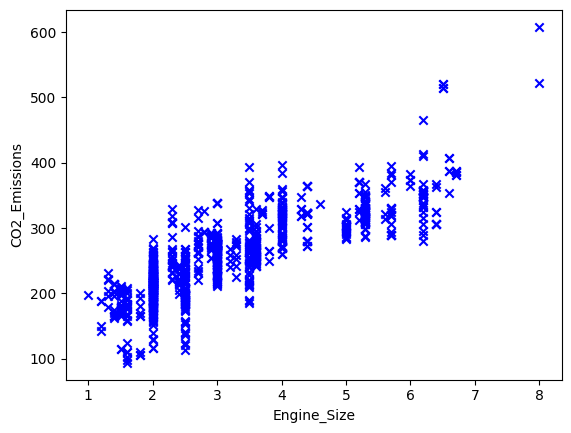

In [2]:
def build_plot(file_path, x, y):
    data = pd.read_csv(file_path)
    plt.scatter(data[x], data[y], c='blue', marker='x')
    plt.xlabel(x)
    plt.ylabel(y)
    return plt

build_plot('resources/CO2_emission.csv', 'Engine_Size', 'CO2_Emissions').show()


In [3]:
import pandas as pd

def extract_texts_from_file(file_path):
    """
    Extract the text data from the csv file.

    Args:
        file_path (str): Relative location of the csv file in the project.

    Returns:
        list: The list of texts as strings.
    """
    data = pd.read_csv(file_path)
    
    # Assuming we want to extract a specific text column, for example, 'age', 'sex', 'cp', etc.
    # Adjust the column name as per your CSV file structure
    if 'text_column' in data.columns:
        return data['text_column'].tolist() 
    else:
        # If there's no 'text_column', return the first few rows for debugging
        return data.head().to_dict(orient='records')

# Assuming the CSV has no text columns but rather numerical data
data = extract_texts_from_file('resources/heart.csv')
print(data[:50])


[{'age': 63, 'sex': 1, 'cp': 3, 'trtbps': 145, 'chol': 233, 'fbs': 1, 'restecg': 0, 'thalachh': 150, 'exng': 0, 'oldpeak': 2.3, 'slp': 0, 'caa': 0, 'thall': 1, 'output': 1}, {'age': 37, 'sex': 1, 'cp': 2, 'trtbps': 130, 'chol': 250, 'fbs': 0, 'restecg': 1, 'thalachh': 187, 'exng': 0, 'oldpeak': 3.5, 'slp': 0, 'caa': 0, 'thall': 2, 'output': 1}, {'age': 41, 'sex': 0, 'cp': 1, 'trtbps': 130, 'chol': 204, 'fbs': 0, 'restecg': 0, 'thalachh': 172, 'exng': 0, 'oldpeak': 1.4, 'slp': 2, 'caa': 0, 'thall': 2, 'output': 1}, {'age': 56, 'sex': 1, 'cp': 1, 'trtbps': 120, 'chol': 236, 'fbs': 0, 'restecg': 1, 'thalachh': 178, 'exng': 0, 'oldpeak': 0.8, 'slp': 2, 'caa': 0, 'thall': 2, 'output': 1}, {'age': 57, 'sex': 0, 'cp': 0, 'trtbps': 120, 'chol': 354, 'fbs': 0, 'restecg': 1, 'thalachh': 163, 'exng': 1, 'oldpeak': 0.6, 'slp': 2, 'caa': 0, 'thall': 2, 'output': 1}]


## CO2 emissions

Process file `CO2_emission.csv`. Build a model, that would predict CO2 emissions from the size of the engine of car. Visualize model on a plot.

Choose regression model that would best fit the data. Choose the library for model implementation (sklearn, other library, custom implementation).

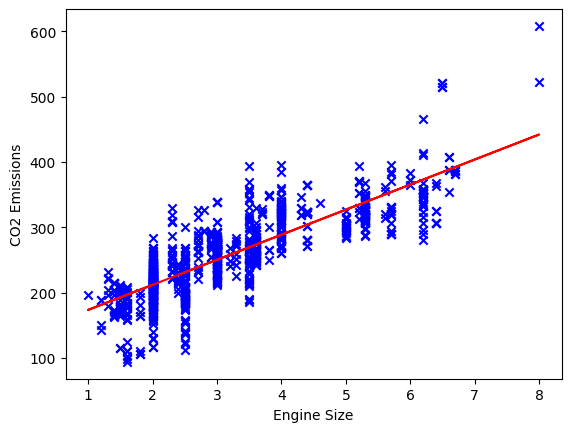

(array([38.32301106]), 135.3260546026322)

In [4]:
def CO2_emissions(data):
    """
    Build a model that would predict CO2 emissions from the size of the engine of car. Visualize model on a plot.

    Args:
        data: CO2 emissions data.

    Returns:
        list: The list of model theta parameters.
    """
    X = data[['Engine_Size']]
    y = data['CO2_Emissions']
    
    model = LinearRegression()
    model.fit(X, y)
    
    plt.scatter(X, y, c='blue', marker='x')
    plt.plot(X, model.predict(X), color='red')
    plt.xlabel('Engine Size')
    plt.ylabel('CO2 Emissions')
    plt.show()
    
    return model.coef_, model.intercept_

data = pd.read_csv('resources/CO2_emission.csv')
CO2_emissions(data)


## Ice Cream Sales

Process file `ice_cream_selling_data.csv`. Build a model, that would predict ice cream sales based on the temperature. Visualize model on a plot.

Choose regression model that would best fit the data. Choose the library for model implementation (sklearn, other library, custom implementation).

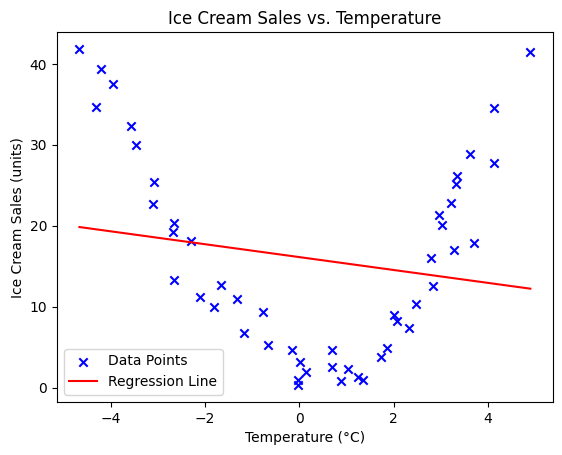

Model coefficients: [-0.79645711]
Model intercept: 16.121749391993667


In [5]:
def ice_cream_selling(data):
    """
    Build a model that would predict ice cream sales based on the temperature. Visualize model on a plot.

    Args:
        data: ice cream sales data.

    Returns:
        list: The list of model theta parameters (slope and intercept).
    """
    # Extract temperature (X) and sales (y)
    X = data[['Temperature (°C)']]  # Adjust column name here
    y = data['Ice Cream Sales (units)']  # Adjust column name here
    
    # Create and train the linear regression model
    model = LinearRegression()
    model.fit(X, y)
    
    # Scatter plot of the actual data points
    plt.scatter(X, y, color='blue', marker='x', label='Data Points')
    
    # Plot the regression line
    plt.plot(X, model.predict(X), color='red', label='Regression Line')
    
    # Add labels and title
    plt.xlabel('Temperature (°C)')
    plt.ylabel('Ice Cream Sales (units)')
    plt.title('Ice Cream Sales vs. Temperature')
    
    # Show the plot
    plt.legend()
    plt.show()
    
    # Return model parameters (slope and intercept)
    return model.coef_, model.intercept_

# Load the data
data = pd.read_csv('resources/ice_cream_selling_data.csv')

# Call the function to perform the analysis and display results
coef, intercept = ice_cream_selling(data)
print(f"Model coefficients: {coef}")
print(f"Model intercept: {intercept}")


## Electric Power Consumption

Process file `powerconsumption.csv`. Build a model, that would predict electricity consumption from the weather: temperature, humidity and wind speed. Visualize model on a plot.

Choose regression model that would best fit the data. Choose the library for model implementation (sklearn, other library, custom implementation).

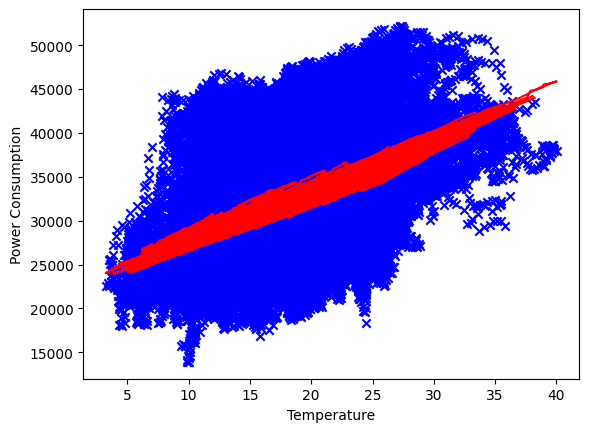

Model coefficients: [ 507.4126886   -47.19708161 -133.51833122]
Model intercept: 26283.80347819723


In [6]:
def power_consumption(data):
    """
    Build a model that would predict electricity consumption from the weather: temperature, humidity, and wind speed.
    Visualize model on a plot.

    Args:
        data: power consumption data.

    Returns:
        list: The list of model theta parameters.
    """
    # Correct the column name for wind speed
    X = data[['Temperature', 'Humidity', 'WindSpeed']]  # Use 'WindSpeed' instead of 'Wind_Speed'
    y = data['PowerConsumption_Zone1']  # Assuming you want to predict 'PowerConsumption_Zone1'
    
    model = LinearRegression()
    model.fit(X, y)
    
    # Scatter plot of Temperature vs Power Consumption
    plt.scatter(data['Temperature'], y, c='blue', marker='x')
    plt.plot(data['Temperature'], model.predict(X), color='red')
    plt.xlabel('Temperature')
    plt.ylabel('Power Consumption')
    plt.show()
    
    # Return model parameters (coefficients and intercept)
    return model.coef_, model.intercept_

# Load the data
data = pd.read_csv('resources/powerconsumption.csv')

# Call the function to perform the analysis and display results
coef, intercept = power_consumption(data)
print(f"Model coefficients: {coef}")
print(f"Model intercept: {intercept}")


## Heart Conditions Predictions

Process file `heart.csv`. It has the following data:

- age - Age of the patient
- sex - Sex of the patient
- cp - Chest pain type ~ 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic
- trtbps - Resting blood pressure (in mm Hg)
- chol - Cholestoral in mg/dl fetched via BMI sensor
- fbs - (fasting blood sugar > 120 mg/dl) ~ 1 = True, 0 = False
- restecg - Resting electrocardiographic results ~ 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy
- thalachh - Maximum heart rate achieved
- oldpeak - Previous peak
- slp - Slope
- caa - Number of major vessels
- thall - Thalium Stress Test result ~ (0,3)
- exng - Exercise induced angina ~ 1 = Yes, 0 = No
- output - Target variable - risk of heart attack - 1 is high chance of heart attack and 0 is low chance.

Use classification model (choose model best fitting model yourself). Choose parameters that would best fit for making a prediction on. Visualize model on a plot.

*Bonus points*: split data into train data and validation data. Validate your model.

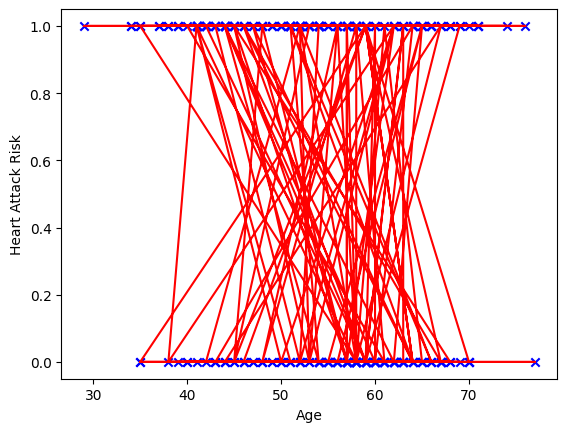

Model Accuracy: 81.32%


(array([[ 0.00537782, -1.13333824,  0.80443811, -0.00778533, -0.00200484,
          0.36128933,  0.61595381,  0.01749022, -1.04070986, -0.50761331,
          0.79906393, -1.04569148, -1.16311689]]),
 array([1.3492469]))

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def heart_classification(data):
    """
    Build a model, that would classify risk category for heart attack.
    Visualize model on a plot.

    Args:
        data: heart medical data.

    Returns:
        list: The list of model theta parameters.
    """
    X = data.drop('output', axis=1)
    y = data['output']
    
    # Split into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)
    
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    
    plt.scatter(X['age'], y, c='blue', marker='x')
    plt.plot(X['age'], model.predict(X), color='red')
    plt.xlabel('Age')
    plt.ylabel('Heart Attack Risk')
    plt.show()
    
    print(f"Model Accuracy: {accuracy * 100:.2f}%")
    
    return model.coef_, model.intercept_

data = pd.read_csv('resources/heart.csv')
heart_classification(data)


## Additional (extra credit)

There are more files in the `resources` folder. Take a look at the. Visualize data in these files. Choose ML algorithm for building a model and making predictions for new data. Visualize the model.

1. Telecom Customer Data (telecom_cus.csv)
This dataset seems to be about customer demographics and a category variable (custcat). We can use classification algorithms like Logistic Regression or Random Forest to predict the customer category based on the demographic data.

2. Salary Dataset (salary_dataset.csv)
This dataset contains YearsExperience and Salary, so we can predict salary based on years of experience using Linear Regression.

3. Drug Dataset (drug.csv)
We can predict the drug category (drug) based on features like age, sex, bp (blood pressure), and cholesterol using Logistic Regression or Random Forest for classification.

4. Customer Segmentation Data (cust_segmentation_Data.csv)
This dataset seems like it’s about customer demographics and behavior, with DebtIncomeRatio as the target. We can use KMeans Clustering for segmentation.

5. Churn Data (churn_Data.csv)
The target is churn, indicating whether a customer has churned or not. We can use Logistic Regression or Random Forest for classification.

6. Cell Samples Dataset (cell_samples.csv)
This dataset is about cell features and whether the cell is benign or malignant (Class). This is a classic classification problem, and Logistic Regression or Random Forest would be a good choice.

7. Car Sales Data (cars_clus.csv)
We can cluster cars based on their features like price, horsepow, mpg, etc., using KMeans Clustering.

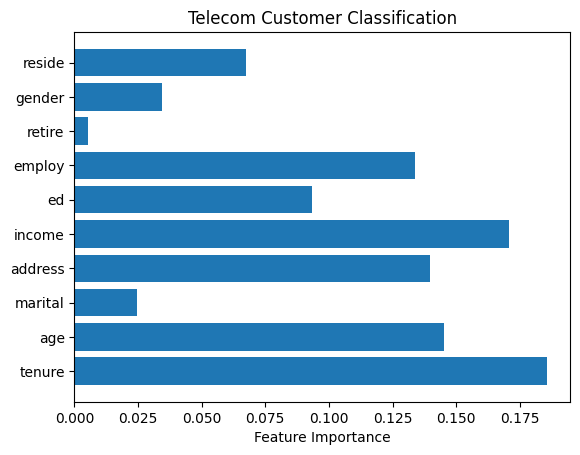

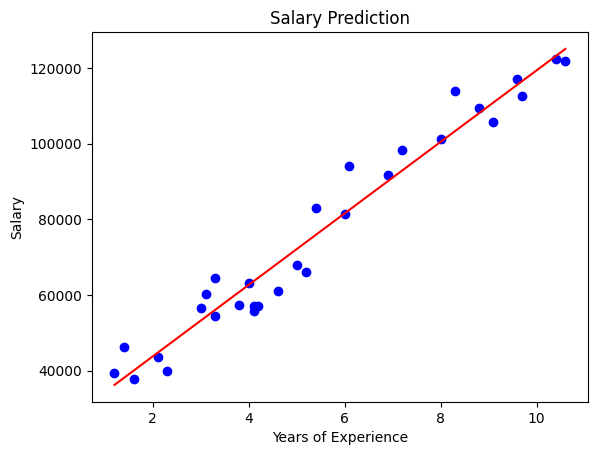

Coefficient: [9449.96232146], Intercept: 24848.203966523208


C:\Users\stere\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


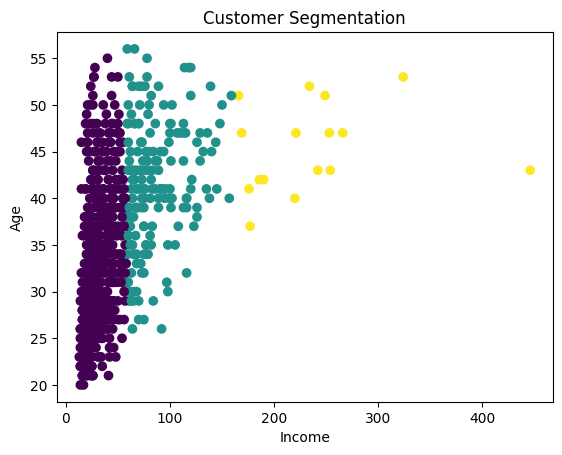

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00        58

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Accuracy on test set: 0.96


C:\Users\stere\AppData\Local\Temp\ipykernel_34344\3015545974.py:91: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data = data.apply(pd.to_numeric, errors='ignore')


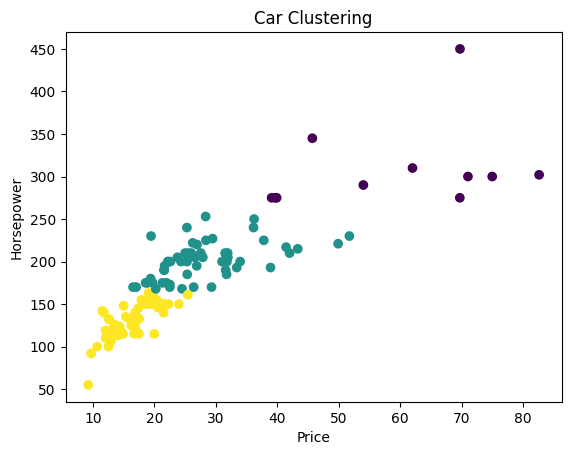

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.preprocessing import LabelEncoder

def telecom_customer(data):
    X = data[['tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ', 'retire', 'gender', 'reside']]
    y = data['custcat']
    
    model = RandomForestClassifier()
    model.fit(X, y)
    
    # Visualizing the importance of features
    plt.barh(X.columns, model.feature_importances_)
    plt.xlabel('Feature Importance')
    plt.title('Telecom Customer Classification')
    plt.show()

    return model

def salary_prediction(data):
    X = data[['YearsExperience']]
    y = data['Salary']
    
    model = LinearRegression()
    model.fit(X, y)
    
    # Plotting the regression line
    plt.scatter(X, y, c='blue')
    plt.plot(X, model.predict(X), color='red')
    plt.xlabel('Years of Experience')
    plt.ylabel('Salary')
    plt.title('Salary Prediction')
    plt.show()

    return model.coef_, model.intercept_

def drug_classification(data):
    # Encoding categorical features
    label_encoder = LabelEncoder()
    data['sex'] = label_encoder.fit_transform(data['sex'])
    data['bp'] = label_encoder.fit_transform(data['bp'])
    data['cholesterol'] = label_encoder.fit_transform(data['cholesterol'])
    
    X = data[['age', 'sex', 'bp', 'cholesterol', 'Na_to_K']]
    y = data['drug']
    
    model = LogisticRegression()
    model.fit(X, y)
    
    return model

def customer_segmentation(data):
    X = data[['Age', 'Edu', 'Years Employed', 'Income', 'Card Debt', 'Other Debt', 'DebtIncomeRatio']]
    
    model = KMeans(n_clusters=3)  # Arbitrary choice for clustering
    model.fit(X)
    
    # Visualizing clusters
    plt.scatter(X['Income'], X['Age'], c=model.labels_)
    plt.xlabel('Income')
    plt.ylabel('Age')
    plt.title('Customer Segmentation')
    plt.show()

    return model

def churn_prediction(data):
    X = data[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'callcard', 'wireless']]
    y = data['churn']
    
    model = RandomForestClassifier()
    model.fit(X, y)
    
    # Evaluating the model
    y_pred = model.predict(X)
    print(classification_report(y, y_pred))
    
    return model

def cell_classification(data):
    # Replace '?' with NaN
    data.replace('?', np.nan, inplace=True)

    # Convert columns to numeric (ignore errors for non-numeric columns)
    data = data.apply(pd.to_numeric, errors='ignore')

    # Drop rows with missing values
    data.dropna(inplace=True)
    
    # Features and target variable
    X = data[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
    y = data['Class']
    
    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Logistic Regression model
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    # Print accuracy on test set
    accuracy = model.score(X_test, y_test)
    print(f'Accuracy on test set: {accuracy:.2f}')
    
    return model

def car_clustering(data):
    X = data[['price', 'engine_s', 'horsepow', 'mpg', 'width', 'length']]
    
    model = KMeans(n_clusters=3)  # Arbitrary choice for clustering
    model.fit(X)
    
    # Visualizing the clusters
    plt.scatter(X['price'], X['horsepow'], c=model.labels_)
    plt.xlabel('Price')
    plt.ylabel('Horsepower')
    plt.title('Car Clustering')
    plt.show()

    return model

# Example usage for telecom dataset
data_telecom = pd.read_csv('resources/telecom_cus.csv')
telecom_customer(data_telecom)

# Example usage for salary prediction
data_salary = pd.read_csv('resources/salary_dataset.csv')
coef, intercept = salary_prediction(data_salary)
print(f"Coefficient: {coef}, Intercept: {intercept}")

# Example usage for drug classification
data_drug = pd.read_csv('resources/drug.csv')
drug_model = drug_classification(data_drug)

# Example usage for customer segmentation
data_segmentation = pd.read_csv('resources/cust_segmentation_Data.csv')
segmentation_model = customer_segmentation(data_segmentation)

# Example usage for churn prediction
data_churn = pd.read_csv('resources/churn_Data.csv')
churn_model = churn_prediction(data_churn)

# Example usage for cell classification
data_cell = pd.read_csv('resources/cell_samples.csv')
cell_model = cell_classification(data_cell)

# Example usage for car clustering
data_cars = pd.read_csv('resources/cars_clus.csv')
car_model = car_clustering(data_cars)
